# Analyze diversity of clone barcode libraries

The notebooks to preprocess the data for viral index 1 and 2 ("barcode_diversity_library1.ipynb" and "barcode_diversity_library2.ipynb") must be run before this notebook.

# Introduction

## Imports

In [1]:
import sys
import os
import time

import numpy as np
import scipy
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns

## Set output parameters

In [2]:
# Set pandas display options
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

# Set plot display options
FONTSIZE = 8  # universal fontsize
params = {
    'font.size': FONTSIZE,
    'axes.titlesize': FONTSIZE,
    'axes.labelsize': FONTSIZE,
    'legend.fontsize': FONTSIZE,
    'xtick.labelsize': FONTSIZE,
    'ytick.labelsize': FONTSIZE,
    'font.family': "Helvetica",
    'mathtext.fontset': 'custom',
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.dpi': 300
   }
mpl.rcParams.update(params)
sns.set_style("ticks", {'axes.grid' : False})

# Set plot output options
output_dir = "outs/barcode_diversity"
output_suffix = ""
output_formats = [".png", ".pdf"]

mpl.rc('savefig', dpi=300)

# Define convenience function for saving figures

savefig = True
savefig_args = {"dpi": 300, "bbox_inches": "tight", "pad_inches": 0.1}

def save_figure(fig, name, output_dir=output_dir, output_suffix=output_suffix, output_formats=output_formats, savefig_args=savefig_args):
    if savefig:
        for output_format in output_formats:
            fig.savefig(output_dir + "/" + name + output_suffix + output_format, **savefig_args)
    return None

In [3]:
# Report plot parameters
sns.plotting_context()

{'font.size': 8.0,
 'axes.labelsize': 8.0,
 'axes.titlesize': 8.0,
 'xtick.labelsize': 8.0,
 'ytick.labelsize': 8.0,
 'legend.fontsize': 8.0,
 'legend.title_fontsize': None,
 'axes.linewidth': 0.8,
 'grid.linewidth': 0.8,
 'lines.linewidth': 1.5,
 'lines.markersize': 6.0,
 'patch.linewidth': 1.0,
 'xtick.major.width': 0.8,
 'ytick.major.width': 0.8,
 'xtick.minor.width': 0.6,
 'ytick.minor.width': 0.6,
 'xtick.major.size': 3.5,
 'ytick.major.size': 3.5,
 'xtick.minor.size': 2.0,
 'ytick.minor.size': 2.0}

# Load data

## Load barcode counts

In [4]:
barcode_counts = {}

In [5]:
name = "sFH2"
infile = "outs/barcode_diversity_library1/reads_clean_full_barcode_counts.tsv"

x = pd.read_csv(infile, sep="\t", header=0, index_col=None)
x = x.rename({"Unnamed: 0": "barcode", "barcode": "count"}, axis=1)
x = x.set_index("barcode")

print(x.shape)

barcode_counts[name] = x

(1930166, 1)


In [6]:
name = "sFH3"
infile = "outs/barcode_diversity_library2/reads_clean_full_barcode_counts.tsv"

x = pd.read_csv(infile, sep="\t", header=0, index_col=None)
x = x.rename({"Unnamed: 0": "barcode", "barcode": "count"}, axis=1)
x = x.set_index("barcode")

print(x.shape)

barcode_counts[name] = x

(2066241, 1)


## Load capture-recapture statistics

In [7]:
diversity = {}

In [8]:
name = "sFH2"
infile = "outs/barcode_diversity_library1/diversity_subsampled_summary.tsv"

x = pd.read_csv(infile, sep="\t", header=0, index_col=0)
diversity[name] = x

print(x.shape)
x

(10, 3)


,depth,count_unique,chao1
0,0.1,227005.3,5.536900e+06
1,0.2,444673.1,5.819025e+06
2,0.3,653839.1,6.082050e+06
3,0.4,855219.4,6.333074e+06
4,0.5,1049411.5,6.567537e+06
5,0.6,1237039.3,6.791050e+06
6,0.7,1418598.1,7.011862e+06
7,0.8,1594332.3,7.217604e+06
8,0.9,1764774.7,7.414831e+06
9,1.0,1930166.0,7.607711e+06


In [9]:
name = "sFH3"
infile = "outs/barcode_diversity_library2/diversity_subsampled_summary.tsv"

x = pd.read_csv(infile, sep="\t", header=0, index_col=0)
diversity[name] = x

print(x.shape)
x

(10, 3)


,depth,count_unique,chao1
0,0.1,267676.0,3.799707e+06
1,0.2,516568.1,4.117388e+06
2,0.3,749357.7,4.402006e+06
3,0.4,968130.1,4.662639e+06
4,0.5,1174616.5,4.915071e+06
5,0.6,1370414.5,5.159969e+06
6,0.7,1556576.3,5.390997e+06
7,0.8,1734046.7,5.612910e+06
8,0.9,1903615.1,5.824601e+06
9,1.0,2066241.0,6.027586e+06


## Load collision probability

In [10]:
collision = {}

In [11]:
name = "sFH2"
infile = "outs/barcode_diversity_library1/collision_sampled_summary.tsv"

x = pd.read_csv(infile, sep="\t", header=0, index_col=0)
collision[name] = x

print(x.shape)
x

(10, 4)


,n_cells,frac_unique,sem_frac_unique,std_frac_unique
0,100,1.000000,0.000000,0.000000
1,200,0.999950,0.000050,0.000503
2,500,0.999980,0.000020,0.000200
3,1000,0.999910,0.000029,0.000288
4,2000,0.999770,0.000032,0.000321
5,5000,0.999496,0.000034,0.000336
6,10000,0.999043,0.000031,0.000309
7,20000,0.998039,0.000034,0.000335
8,50000,0.995174,0.000030,0.000297
9,100000,0.990541,0.000031,0.000308


In [12]:
name = "sFH3"
infile = "outs/barcode_diversity_library2/collision_sampled_summary.tsv"

x = pd.read_csv(infile, sep="\t", header=0, index_col=0)
collision[name] = x

print(x.shape)
x

(10, 4)


,n_cells,frac_unique,sem_frac_unique,std_frac_unique
0,100,1.000000,0.000000,0.000000
1,200,1.000000,0.000000,0.000000
2,500,0.999880,0.000056,0.000557
3,1000,0.999800,0.000043,0.000427
4,2000,0.999655,0.000045,0.000448
5,5000,0.999249,0.000043,0.000426
6,10000,0.998522,0.000041,0.000408
7,20000,0.997147,0.000038,0.000376
8,50000,0.992913,0.000038,0.000380
9,100000,0.986041,0.000042,0.000420


# Plot barcode diversity

## Set parameters for plotting

In [13]:
palette = ["#756bb1", "#31a354"]

## Counts of unique barcodes

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


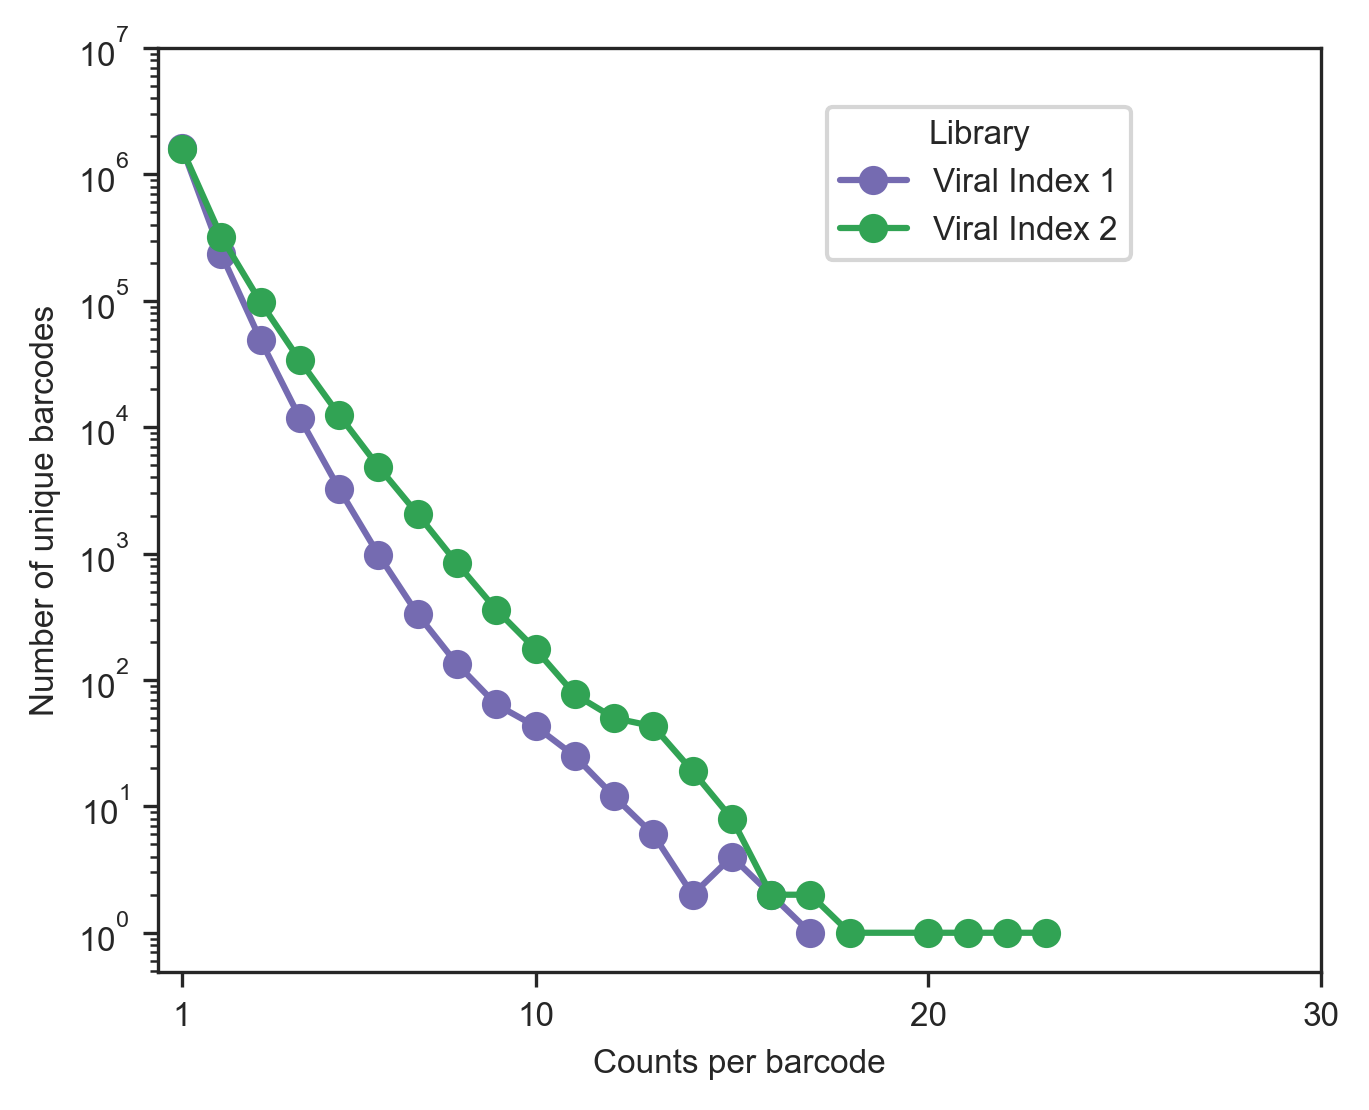

In [14]:
# Barcode counts

bins = np.arange(1, 30+2) - 0.5
bin_centers = (bins[:-1] + bins[1:])/2  # get center of each bin

fig, ax = plt.subplots(1, 1, figsize=(5,4))

x = barcode_counts["sFH2"]
count, _ = np.histogram(x, bins=bins)  # get histogram counts
ax.plot(bin_centers[count > 0], count[count > 0], marker="o", color=palette[0], label="Viral Index 1")

x = barcode_counts["sFH3"]
count, _ = np.histogram(x, bins=bins)  # get histogram counts
ax.plot(bin_centers[count > 0], count[count > 0], marker="o", color=palette[1], label="Viral Index 2")

ax.set_yscale("log")
ax.set_ylim(top=1e7)

ax.set_xlabel("Counts per barcode")
ax.set_ylabel("Number of unique barcodes")

ax.set_xticks([1, 10, 20, 30])
ax.set_xlim(left=0.4)

fig.legend(loc="upper left", bbox_to_anchor=(0.54, 0.85), title="Library")

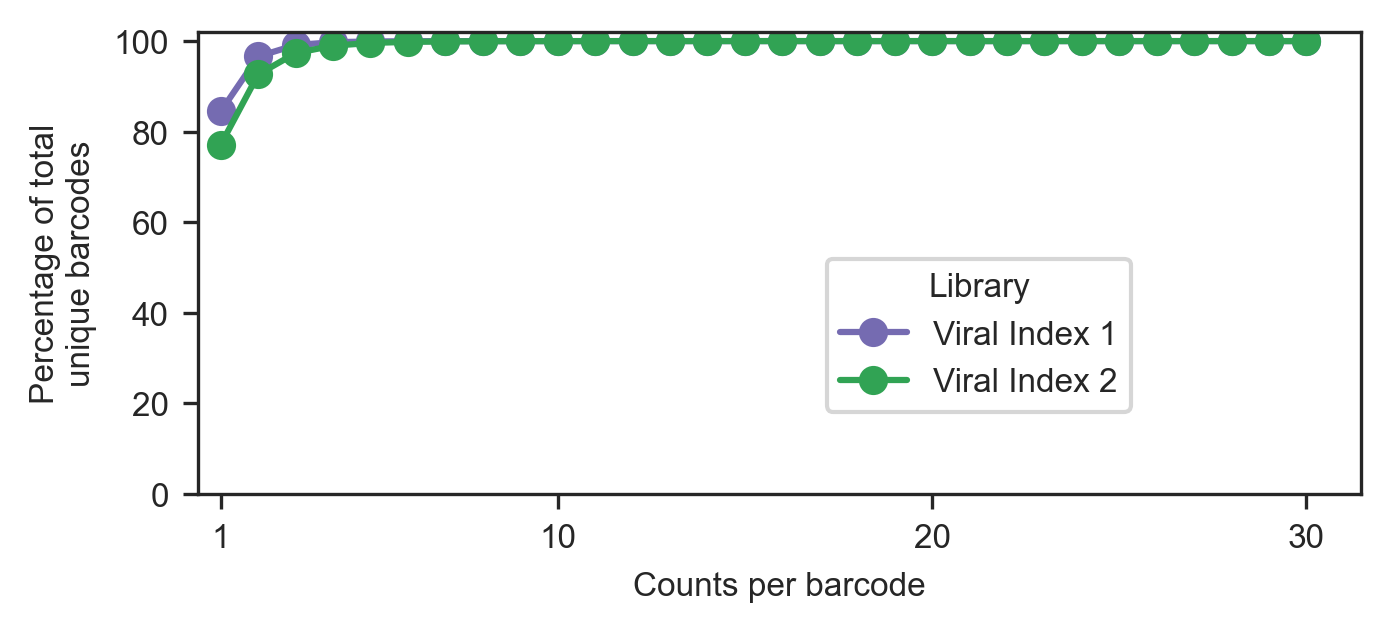

In [15]:
# Cumulative barcode fraction

bins = np.arange(1, 30+2) - 0.5
bin_centers = (bins[:-1] + bins[1:])/2  # get center of each bin

fig, ax = plt.subplots(1, 1, figsize=(5,2))

x = barcode_counts["sFH2"]
count, _ = np.histogram(x, bins=bins)  # get histogram counts
pdf = count / sum(count)  # find the PDF of the histogram using count values
cdf = np.cumsum(pdf)  # calculate CDF from PDF
cdf_percentage = cdf * 100  # convert CDF to percentage
ax.plot(bin_centers, cdf_percentage, marker="o", color=palette[0], label="Viral Index 1")

x = barcode_counts["sFH3"]
count, _ = np.histogram(x, bins=bins)  # get histogram counts
pdf = count / sum(count)  # find the PDF of the histogram using count values
cdf = np.cumsum(pdf)  # calculate CDF from PDF
cdf_percentage = cdf * 100  # convert CDF to percentage
ax.plot(bin_centers, cdf_percentage, marker="o", color=palette[1], label="Viral Index 2")

ax.set_ylim(0, 102)

ax.set_xlabel("Counts per barcode")
ax.set_ylabel("Percentage of total\nunique barcodes")

ax.set_xticks([1, 10, 20, 30])
ax.set_xlim(left=0.4)

fig.legend(loc="upper left", bbox_to_anchor=(0.54, 0.65), title="Library")

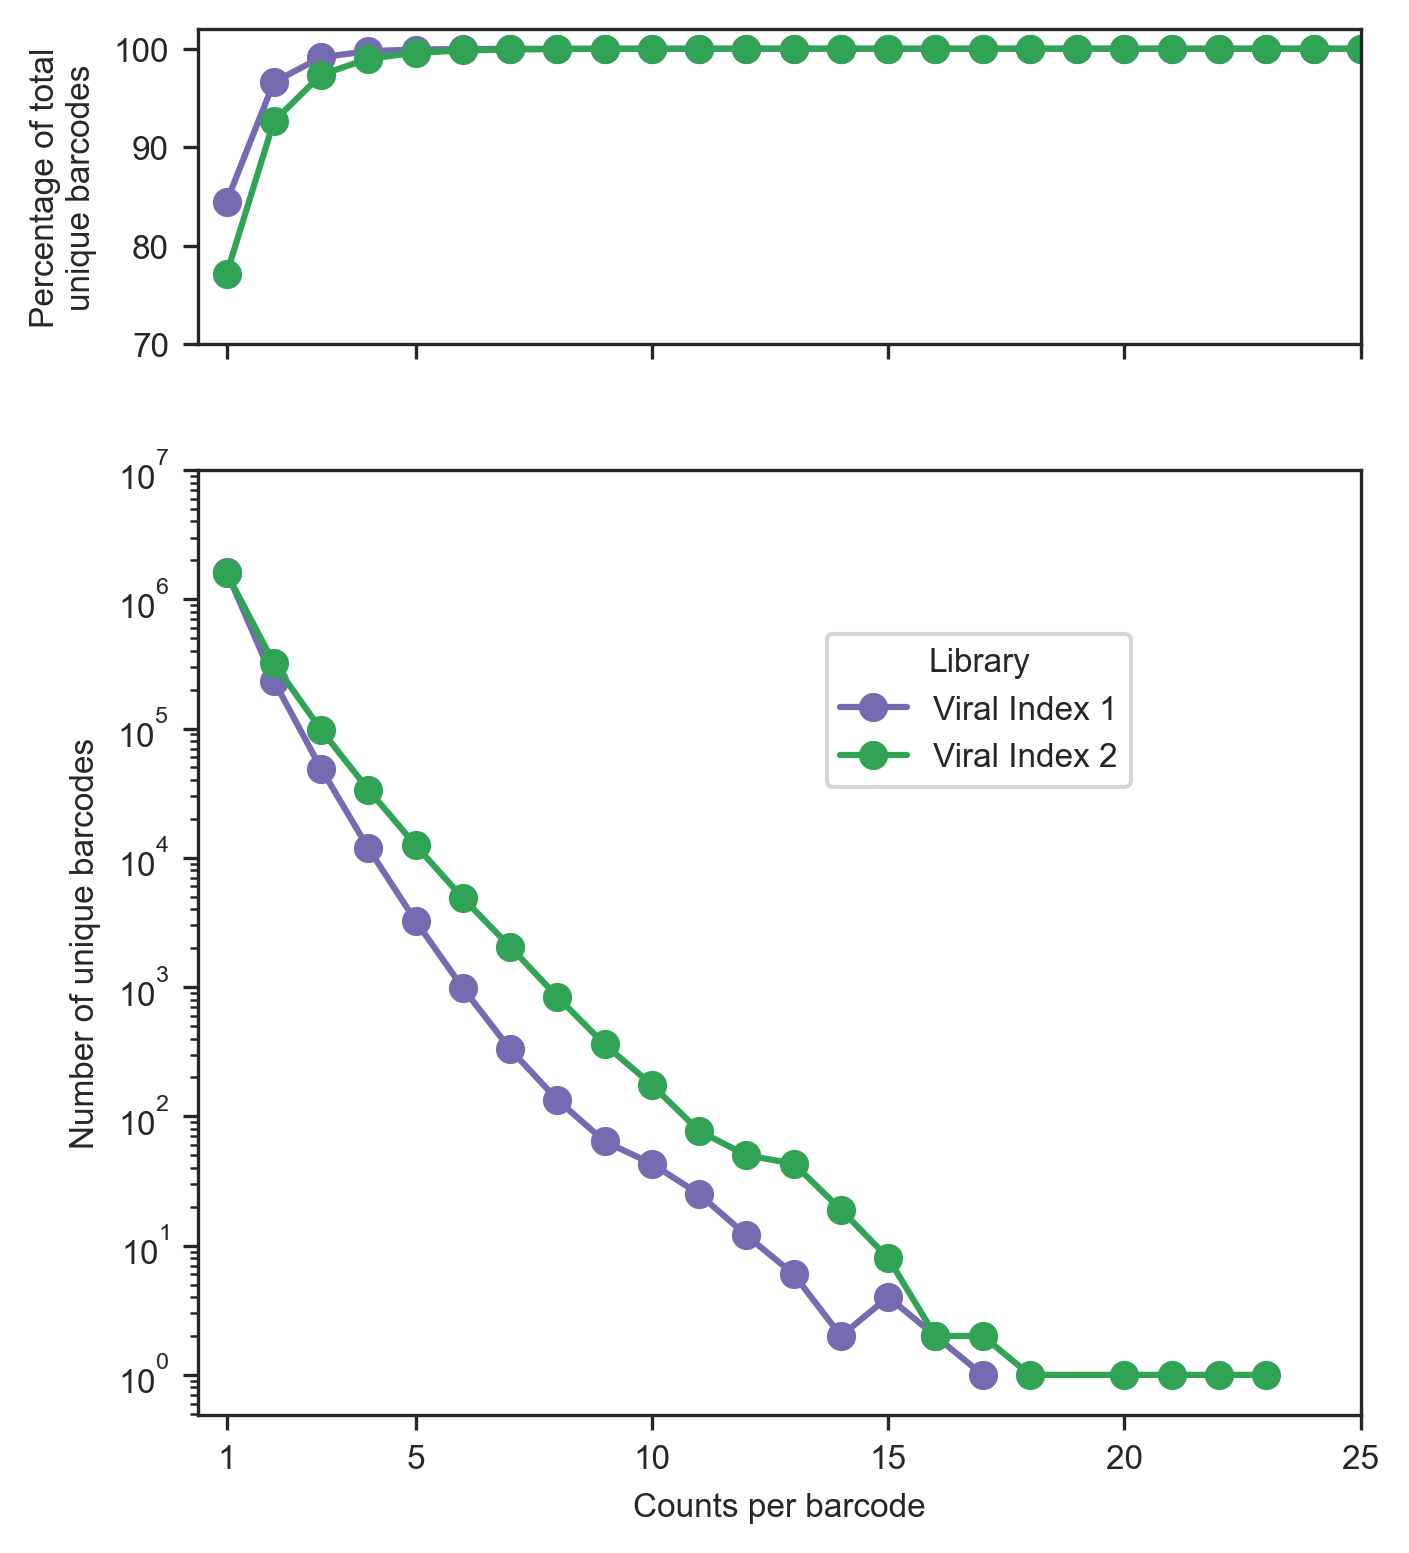

In [16]:
# Barcode counts and cumulative barcode fraction as subplots

bins = np.arange(1, 30+2) - 0.5
bin_centers = (bins[:-1] + bins[1:])/2  # get center of each bin

fig, axes = plt.subplots(2, 1, figsize=(5,6), gridspec_kw={'height_ratios': [1, 3]}, sharex=True)

x = barcode_counts["sFH2"]
count, _ = np.histogram(x, bins=bins)  # get histogram counts
pdf = count / sum(count)  # find the PDF of the histogram using count values
cdf = np.cumsum(pdf)  # calculate CDF from PDF
cdf_percentage = cdf * 100  # convert CDF to percentage

axes[1].plot(bin_centers[count > 0], count[count > 0], marker="o", color=palette[0], label="Viral Index 1")
axes[0].plot(bin_centers, cdf_percentage, marker="o", color=palette[0])

x = barcode_counts["sFH3"]
count, _ = np.histogram(x, bins=bins)  # get histogram counts
pdf = count / sum(count)  # find the PDF of the histogram using count values
cdf = np.cumsum(pdf)  # calculate CDF from PDF
cdf_percentage = cdf * 100  # convert CDF to percentage

axes[1].plot(bin_centers[count > 0], count[count > 0], marker="o", color=palette[1], label="Viral Index 2")
axes[0].plot(bin_centers, cdf_percentage, marker="o", color=palette[1])

ax = axes[1]
ax.set_yscale("log")
ax.set_ylim(top=1e7)

ax.set_xlabel("Counts per barcode")
ax.set_ylabel("Number of unique barcodes")

ax.set_xticks([1, 5, 10, 15, 20, 25])
ax.set_xlim(left=0.4, right=25)

ax = axes[0]
ax.set_ylim(70, 102)
ax.set_ylabel("Percentage of total\nunique barcodes")
ax.set_yticks([70, 80, 90, 100])

fig.legend(loc="upper left", bbox_to_anchor=(0.54, 0.52), title="Library")

save_figure(fig, "barcode_counts_cdf_subplots")

# Capture-recapture estimators of barcode diversity

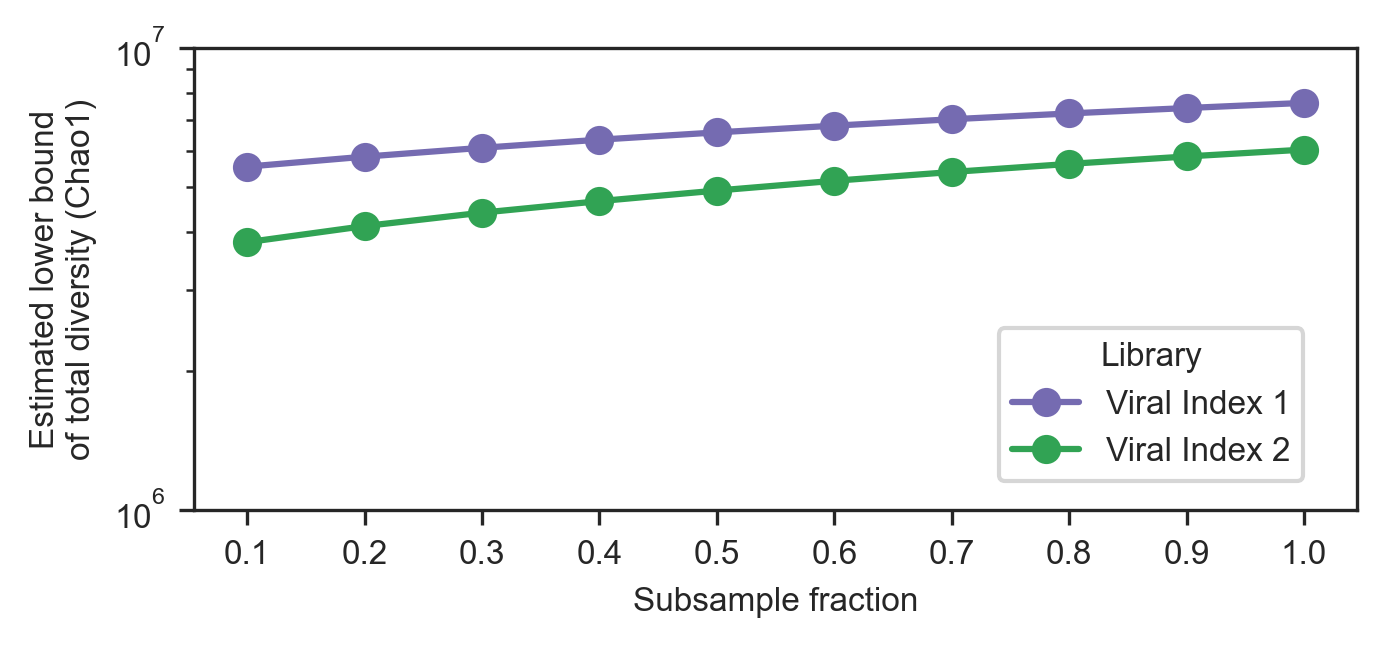

In [17]:
# Plot

fig, ax = plt.subplots(1, 1, figsize=(5,2))

data = diversity["sFH2"]
ax.plot(data["depth"],
         data["chao1"],
         marker="o", color=palette[0],
         label="Viral Index 1",
         zorder=3)

data = diversity["sFH3"]
ax.plot(data["depth"],
         data["chao1"],
         marker="o", color=palette[1],
         label="Viral Index 2",
         zorder=3)

ax.set_yscale("log")
ax.set_ylim(1e6, 1e7)

ax.set_xlabel("Subsample fraction")
ax.set_ylabel("Estimated lower bound\nof total diversity (Chao1)")

xticks = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
ax.set_xticks(xticks)

fig.legend(loc="lower right", bbox_to_anchor=(0.88, 0.25), title="Library")

save_figure(fig, "barcode_diversity_estimators_chao1_only")

# Collision probability

Estimate collision probability (cells at start of experiment which share a barcode due to coincidence of independent barcoding events, rather than common clonal origin).

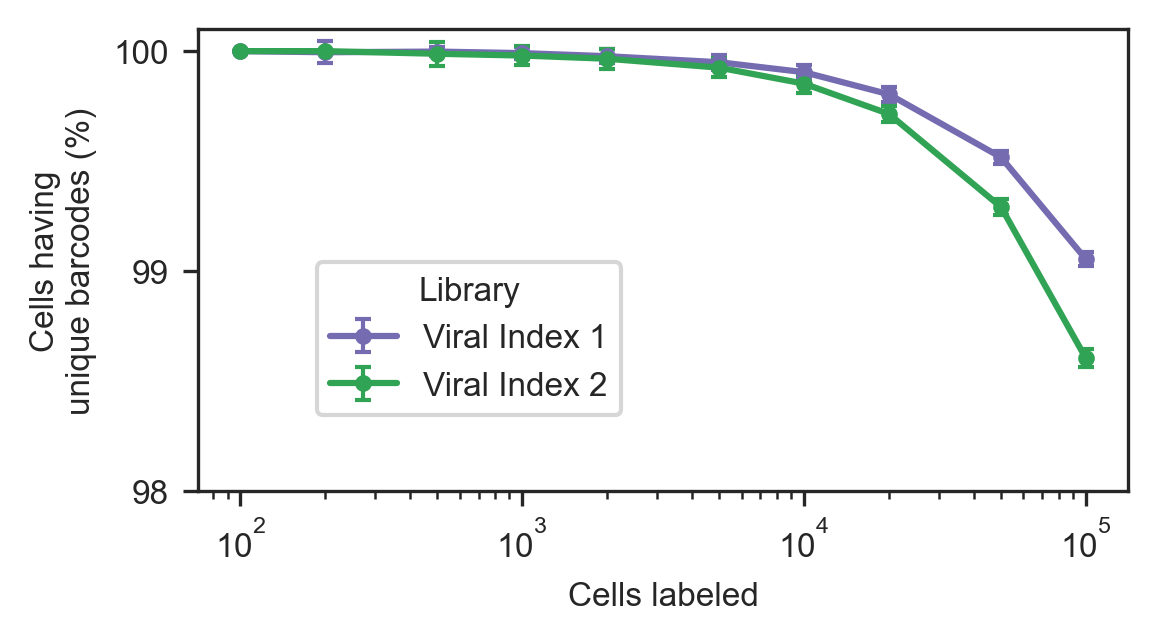

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(4,2))

data = collision["sFH2"]
ax.errorbar(data["n_cells"],
            data["frac_unique"]*100,
            yerr=data["std_frac_unique"]*100,
            capsize=2, elinewidth=1,
            marker=".", color=palette[0],
            label="Viral Index 1")

data = collision["sFH3"]
ax.errorbar(data["n_cells"],
            data["frac_unique"]*100,
            yerr=data["std_frac_unique"]*100,
            capsize=2, elinewidth=1,
            marker=".", color=palette[1],
            label="Viral Index 2")

ax.set_xscale("log")
ax.set_ylim(98, 100.1)

ax.set_xlabel("Cells labeled")
ax.set_ylabel("Cells having\nunique barcodes (%)")

yticks = [98, 99, 100]
# yticks = [98, 98.5, 99, 99.5, 100]
ax.set_yticks(yticks)

fig.legend(loc="lower left", bbox_to_anchor=(0.25, 0.35), title="Library")

save_figure(fig, "collision_sampled_percent_unique_clones")